In [1]:
from dpks.quant_matrix import QuantMatrix

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
qm = QuantMatrix(
    quantification_file="../tests/input_files/data_sepsis.tsv",
    design_matrix_file="../tests/input_files/design_sepsis.tsv")

qm = (
    qm.normalize(
        method="mean",
    )
    .quantify(method="top_n")
)


The dtype argument is deprecated and will be removed in late 2024.
The dtype argument is deprecated and will be removed in late 2024.


In [4]:
trained_clf = qm.train(classifier="xgboost", random_state=None)
qm.interpret(trained_clf.estimator_, shap_algorithm="tree")

[10:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.




The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.


The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.


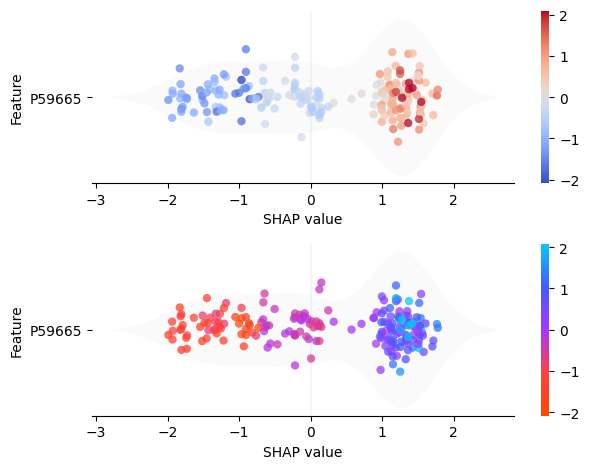

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1)

qm.plot(plot_type='shap_summary', fig=fig, ax=axs[0], cmap="coolwarm", n_display=1)
qm.plot( plot_type='shap_summary', fig=fig, ax=axs[1], n_display=1)
plt.tight_layout()
plt.show()

In [5]:
qm.to_df().FeatureRank.unique()

array([ 3.,  4.,  2.,  1., nan,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

(<Figure size 1000x500 with 3 Axes>,
 array([<AxesSubplot:xlabel='PC1 (14.2%)', ylabel='PC2 (9.6%)'>,
        <AxesSubplot:xlabel='PC1 (13.8%)', ylabel='PC2 (10.6%)'>,
        <AxesSubplot:xlabel='PC1 (31.5%)', ylabel='PC2 (18.2%)'>],
       dtype=object))

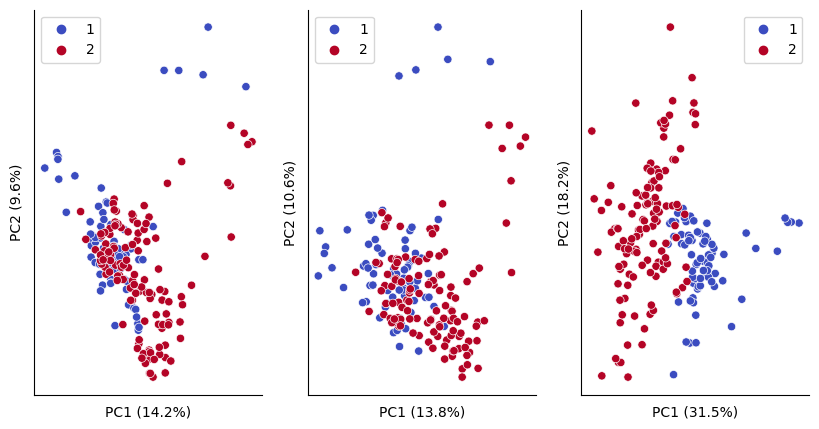

In [6]:
fig, axs = plt.subplots(1,3, figsize=(10,5))

qm.plot(plot_type="rfe_pca", fig=fig, ax=[axs[0], axs[1], axs[2]], cutoffs=[10,5,1])